# Linear models

- RidgeClassifier
- SGDCClassifier
- SGDRClassifier
- LinearRegression
- LogisticRegression
- Lasso
- etc

# Классификатор

## 1. Готовим датасет (берем из библиотеки и делим на трейн и тест)

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

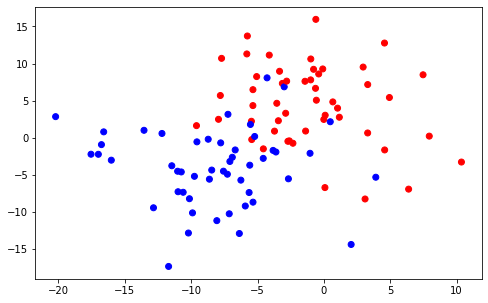

In [75]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8,5))
x = list(map(lambda x: x[0], blobs[0]))
y = list(map(lambda x: x[1], blobs[0]))
pylab.scatter(x, y, c = blobs[1], cmap = colors)

In [76]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], test_size = 0.3,random_state = 1)

## 2. Модель

создание обьекта классификатора - обучение классификатора - применение обученнго класификатора - оценка качества

### RidgeClassifier

In [77]:
ridge_classifier = linear_model.RidgeClassifier(random_state = 8) #создали

In [78]:
ridge_classifier.fit(train_data, train_labels) #обучили

RidgeClassifier(random_state=8)

In [79]:
ridge_predictions = ridge_classifier.predict(test_data) #использовали

In [80]:
print(test_labels)
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [81]:
metrics.accuracy_score(test_labels, ridge_predictions) #оценили качечтво

0.8666666666666667

In [82]:
ridge_classifier.coef_ # Веса признаков

array([[-0.0854443 , -0.07273219]])

In [83]:
ridge_classifier.intercept_ #коеф перед свободным членов

array([-0.31250723])

### LogisticRegression

In [106]:
log_regressor = linear_model.LogisticRegression(random_state = 1)


In [107]:
log_regressor.fit(train_data, train_labels)


LogisticRegression(random_state=1)

In [110]:
log_predictions = log_regressor.predict(test_data)
log_proba_predictions = log_regressor.predict_proba(test_data)


In [111]:
print(test_labels)
print(log_predictions)
print(log_proba_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]
[[9.99254667e-01 7.45333217e-04]
 [4.08279523e-01 5.91720477e-01]
 [4.90541791e-01 5.09458209e-01]
 [3.78296027e-03 9.96217040e-01]
 [7.32221196e-01 2.67778804e-01]
 [2.44262899e-01 7.55737101e-01]
 [9.93761113e-01 6.23888724e-03]
 [9.78405579e-01 2.15944205e-02]
 [9.55344987e-01 4.46550128e-02]
 [1.68318566e-01 8.31681434e-01]
 [9.20548027e-01 7.94519726e-02]
 [8.49635842e-03 9.91503642e-01]
 [8.42172474e-01 1.57827526e-01]
 [4.78103481e-02 9.52189652e-01]
 [4.16878377e-03 9.95831216e-01]
 [7.76668489e-04 9.99223332e-01]
 [2.05937909e-01 7.94062091e-01]
 [9.31195721e-01 6.88042793e-02]
 [2.41180236e-01 7.58819764e-01]
 [8.27655095e-04 9.99172345e-01]
 [8.91142562e-02 9.10885744e-01]
 [9.95944524e-01 4.05547579e-03]
 [9.84077857e-01 1.59221428e-02]
 [3.02681109e-01 6.97318891e-01]
 [1.47440544e-03 9.98525595e-01]
 [7.78506108e-03 9.92214939e-01]
 [2.89544877e-01 7

In [112]:
print(metrics.accuracy_score(test_labels, log_predictions))
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.8
0.8666666666666667


### Оценка качества по кросс валидации

In [113]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [114]:
log_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [115]:
ridge_scoring

array([0.8, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [116]:
log_scoring

array([0.8, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [117]:
print("Ridge mean" , ridge_scoring.mean(), "max", ridge_scoring.max(),"min", ridge_scoring.min(),"std", ridge_scoring.std())

Ridge mean 0.8800000000000001 max 1.0 min 0.7 std 0.08717797887081348


In [118]:
print("Log mean" , log_scoring.mean(), "max", log_scoring.max(),"min", log_scoring.min(),"std", log_scoring.std())

Log mean 0.8800000000000001 max 1.0 min 0.7 std 0.08717797887081348


In [121]:
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
log_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [122]:
print("Ridge mean" , ridge_scoring.mean(), "max", ridge_scoring.max(),"min", ridge_scoring.min(),"std", ridge_scoring.std())
print("Log mean" , log_scoring.mean(), "max", log_scoring.max(),"min", log_scoring.min(),"std", log_scoring.std())

Ridge mean 0.8700000000000001 max 1.0 min 0.7666666666666667 std 0.059535236998305825
Log mean 0.8700000000000001 max 1.0 min 0.7666666666666667 std 0.06137317546507322


# Регрессия

coef - мы просим чтобы нам вернули уравнение тоже (линейное уравнение)

In [123]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                              noise = 5, coef = True, random_state = 2)

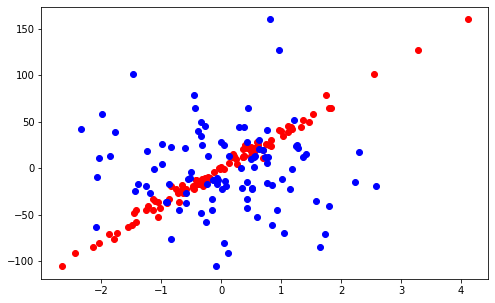

In [124]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [125]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

### Linear regression

In [127]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [128]:
print(test_labels)
print(predictions)

[-16.30914909 -14.97110322 -37.31870104 -11.18242389 126.64909941
 -16.79027112 -24.77820218  12.74038341 -26.87743177  13.31981235
  21.20540389 -45.27502383  49.41686419  11.06961035 -91.477377
  12.47089016  13.02656201 -17.27897399   1.72644759  34.35183007
 -36.44717565  24.47584129 -32.71074998  45.05465366   0.34799656
 -13.99339669 -15.01435792 -84.32102748 -27.02798161 -19.36956003]
[-12.48969432 -12.95446015 -35.57202904 -13.22366768 126.6386551
 -15.07821396 -27.06257529   7.44326192 -28.48725907  14.38221386
  16.53432327 -48.91279306  56.2164722   25.94648183 -94.74000157
  19.93177058  18.78023745 -13.68683948  -0.40358981  39.39381515
 -41.66761805  23.15272761 -44.28809812  42.69024365  -1.98230614
 -15.27412386 -10.45401341 -82.85350915 -25.45915111 -32.59567101]


In [129]:
metrics.mean_absolute_error(test_labels, predictions)

4.124868455005314

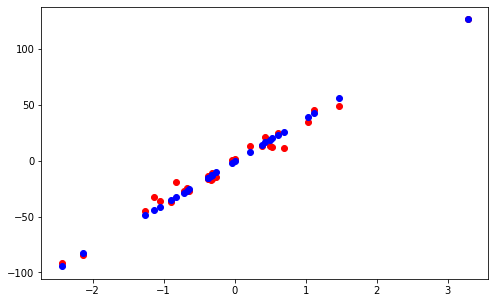

In [138]:
pylab.scatter(test_data[:,0], test_labels, color = 'r')
pylab.scatter(test_data[:,0], predictions, color = 'b')

In [130]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error',cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, std: 1.07371044928902


In [131]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [132]:
coef

array([38.07925837,  0.        ])

In [133]:
linear_regressor.coef_

array([38.70732338,  0.21576432])

In [134]:
linear_regressor.intercept_ #свободный член

-0.5209879835029174

In [135]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [136]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.71*x1 + 0.22*x2 + -0.52


### Lasso

In [139]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [140]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [141]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 38.08*x1 + 0.00*x2
y = 37.94*x1 + 0.00*x2


лассо регуляризация смогла убрать избыточный признак! это очень круто - отличие от обычной линейной регрессии